In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
boston.data.shape
# variable : 13개
# 각 variable에 해당하는 506개의 instance를 가지고 있음.

(506, 13)

In [8]:
print(boston.feature_names)
# variable, 즉 x의 이름들

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
print(boston.DESCR)
# 우리가 보고 싶은 것은 NOX의 효과
# 나머지 변수들은 control variable

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
bos=pd.DataFrame(boston.data)
bos.head() # 506개의 instance 중 head만 출력

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
bos.columns=boston.feature_names # 칼럼 이름 설정
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
##boston.target contains the housing prices. I will add these prices to the bos data frame

bos['PRICE'] = boston.target # price 칼럼을 boston data의 target으로 설정하여 추가
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
from sklearn.linear_model import LinearRegression

In [25]:
X = bos.drop('PRICE', axis=1)
# axis == 0 : 가로줄을 제거
# axis == 1 : 세로줄을 제거
# 즉, data frame에서 price라는 column을 제거하고 data frame에 있는 것들을 feature로 설정한다

In [21]:
lm=LinearRegression( )

In [22]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [34]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])
# 위에 지저분하게 보이는 것을 data frame으로 시각화

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [24]:
lm.intercept_

36.45948838509015

In [29]:
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: 36.45948838509015
Number of coefficients: 13


위 결과값을 equation으로 쓰게 된다면,<br>
집값 = 36.491 -0.108 * CRIM +0.046 * ZN + ... -17.795 * NOX + ...

보통 나중에 실무에서 마지막에 equation을 써주는데, 저렇게 변수로 써주면 보는 사람들은 모른다.<br>
따라서 변수를 설명하는 description table도 작성해줘야 한다.

Text(0.5, 1.0, 'Relationship between RM and Price')

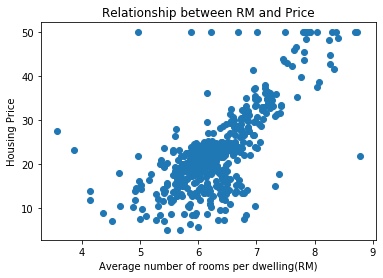

In [35]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling(RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Text(0.5, 1.0, 'True Prices Vs Predicted Prices')

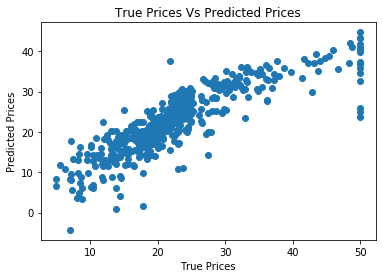

In [36]:
## prediction of Y
lm.predict(X)
lm.predict(X)[0:5] #first 5 house prices

plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices Vs Predicted Prices")